In [6]:
#1

import pandas as pd

df = pd.read_csv("netflix_customer_churn.csv")

In [25]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [26]:
df.isnull().sum()

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [9]:
for col in ["gender", "subscription_type", "region", "device", "payment_method", "favorite_genre"]:
    print(col, df[col].unique())

gender ['Other' 'Female' 'Male']
subscription_type ['Basic' 'Standard' 'Premium']
region ['Africa' 'Europe' 'Asia' 'Oceania' 'South America' 'North America']
device ['TV' 'Mobile' 'Laptop' 'Desktop' 'Tablet']
payment_method ['Gift Card' 'Crypto' 'Debit Card' 'PayPal' 'Credit Card']
favorite_genre ['Action' 'Sci-Fi' 'Drama' 'Horror' 'Romance' 'Comedy' 'Documentary']


In [20]:
#2

import seaborn as sns
import matplotlib.pyplot as plt

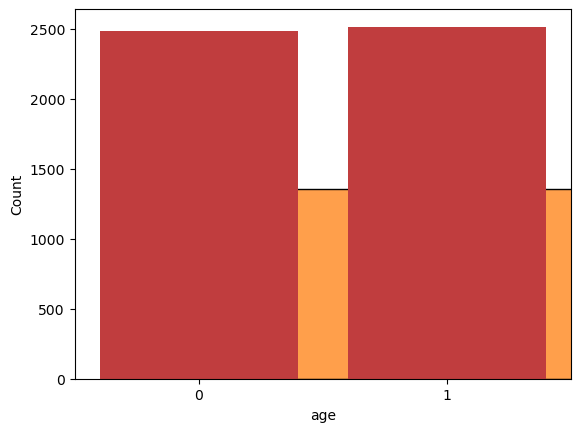

In [19]:
sns.histplot(df.age, kde=True)
sns.histplot(df.watch_hours, bins=30)
sns.histplot(df.monthly_fee)
sns.countplot(x="churned", data=df)
plt.show()

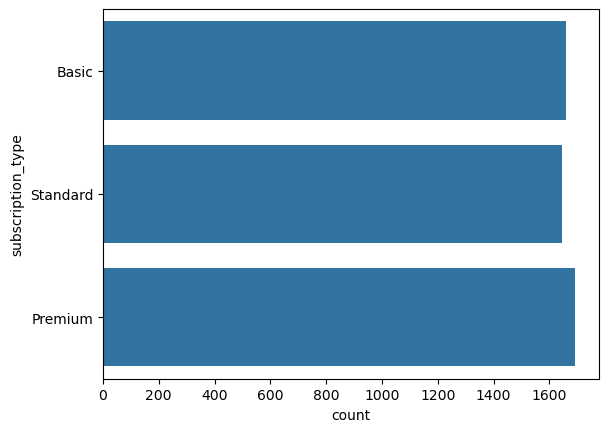

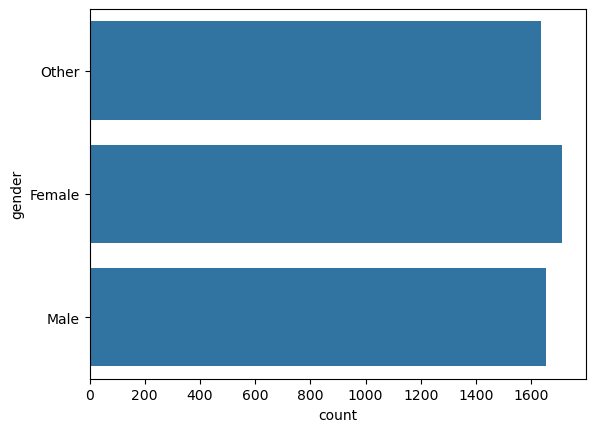

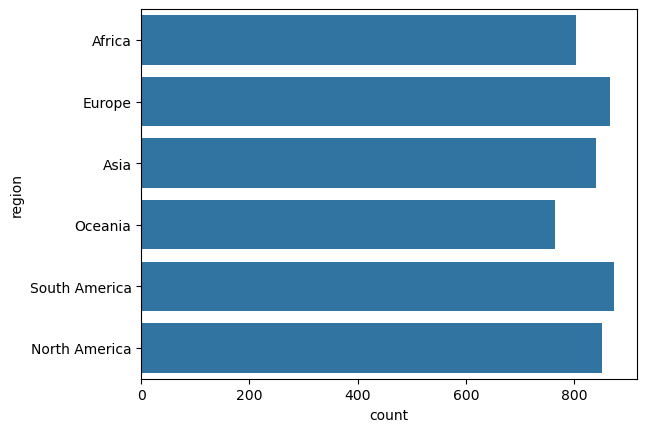

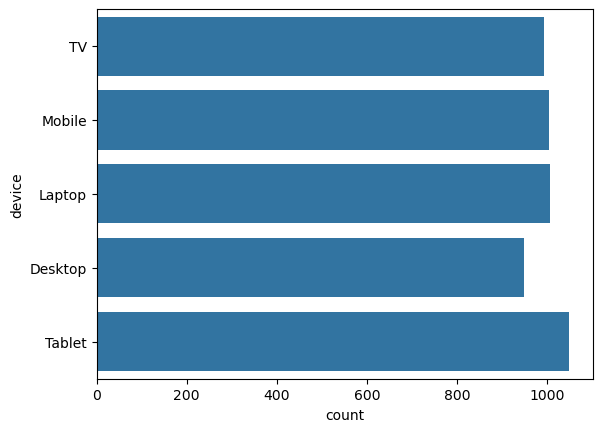

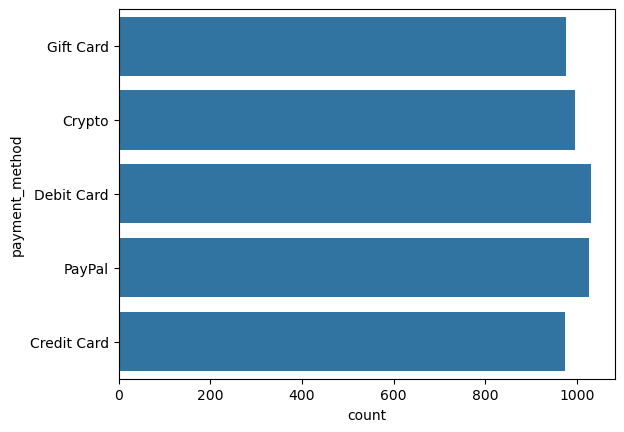

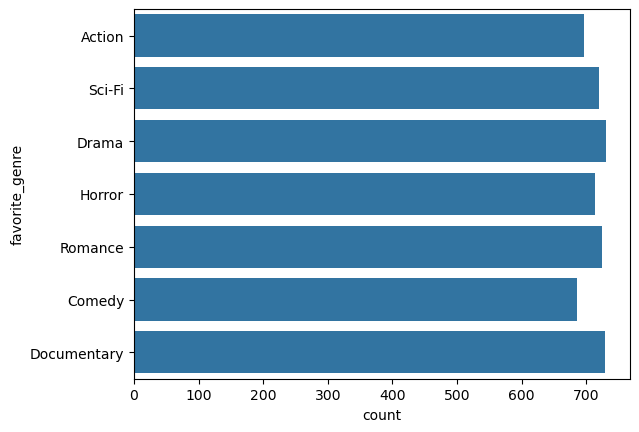

In [27]:
for cat in ["subscription_type", "gender", "region", "device", "payment_method", "favorite_genre"]:
    sns.countplot(y=cat, data=df)
    plt.show()

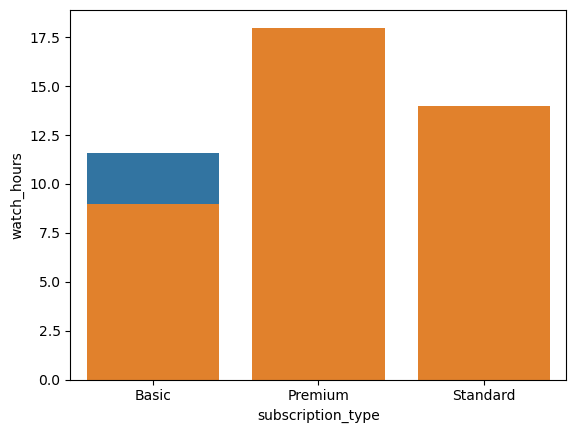

In [28]:
#3

agg = df.groupby("subscription_type")[["watch_hours","monthly_fee"]].mean().reset_index()
sns.barplot(x="subscription_type", y="watch_hours", data=agg)
sns.barplot(x="subscription_type", y="monthly_fee", data=agg)
plt.show()

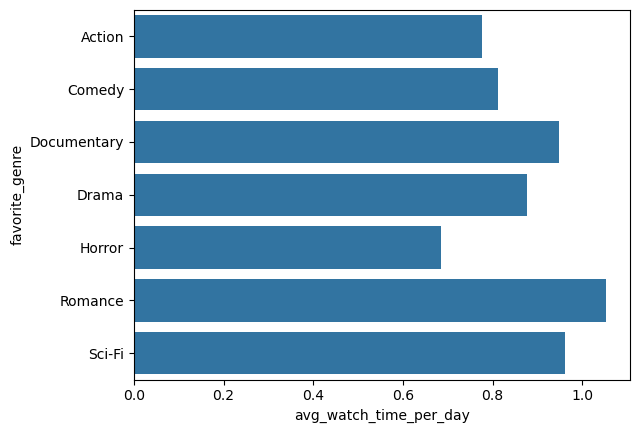

In [29]:
genre_avg = df.groupby("favorite_genre")["avg_watch_time_per_day"].mean().reset_index()
sns.barplot(y="favorite_genre", x="avg_watch_time_per_day", data=genre_avg)
plt.show()

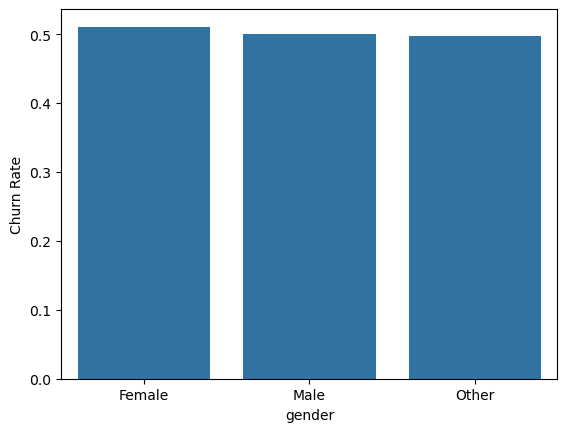

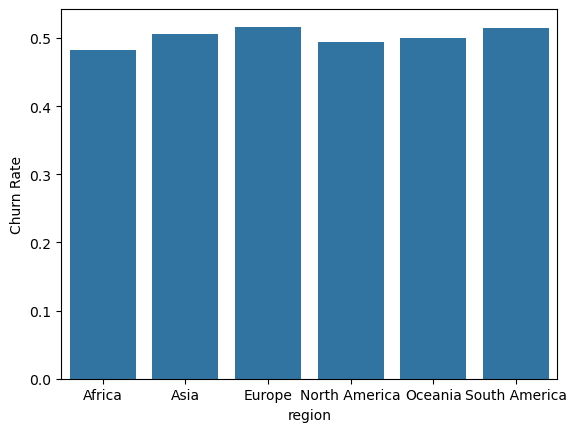

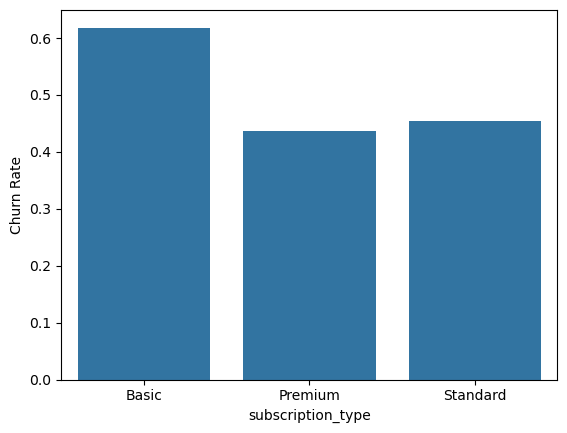

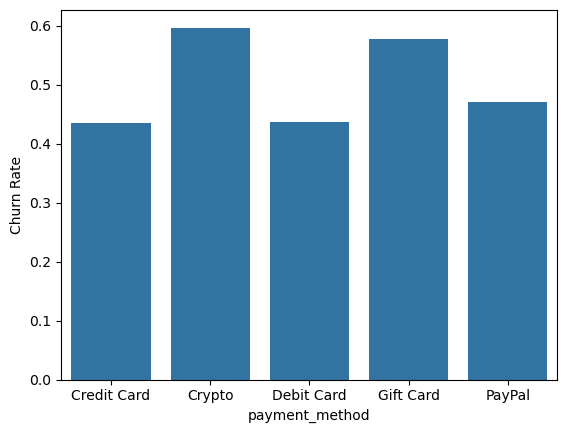

In [24]:
for cat in ["gender", "region", "subscription_type", "payment_method"]:
    churn_rate = df.groupby(cat)["churned"].mean().reset_index()
    sns.barplot(x=cat, y="churned", data=churn_rate)
    plt.ylabel("Churn Rate")
    plt.show()

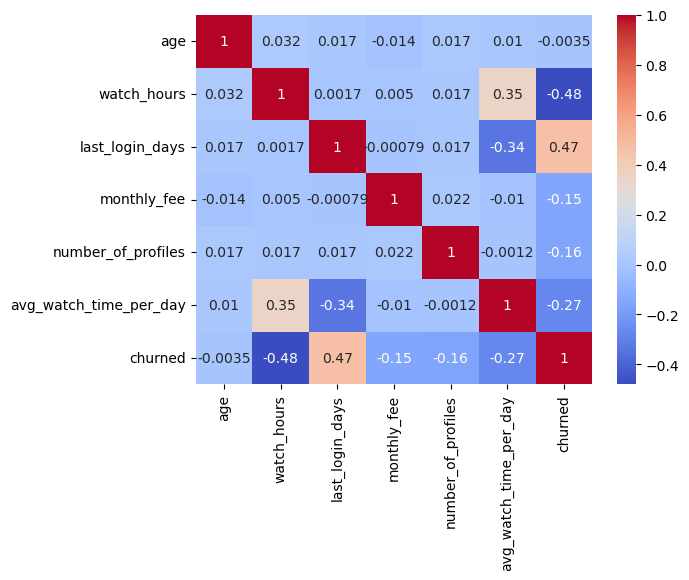

In [22]:
#4

num_cols = ["age", "watch_hours", "last_login_days", "monthly_fee", "number_of_profiles", "avg_watch_time_per_day", "churned"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()